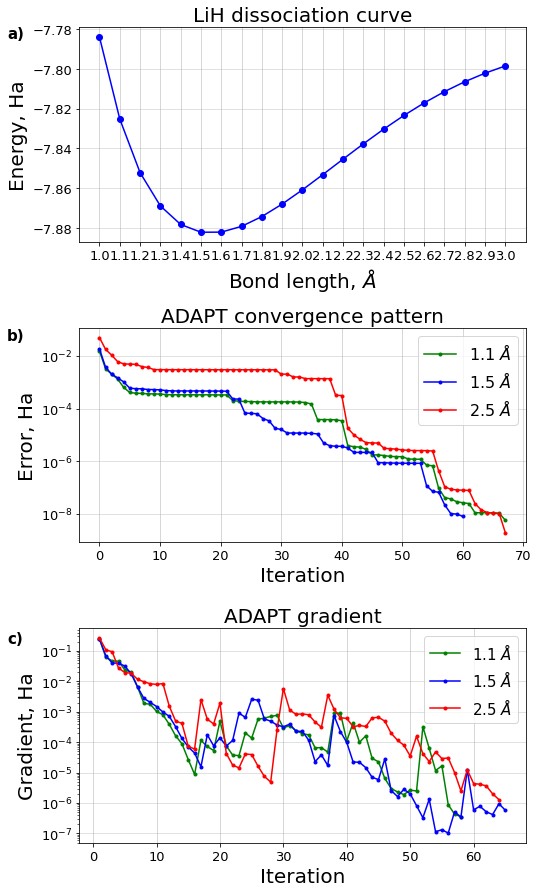

In [46]:
import matplotlib.pyplot as plt
import numpy as np

import pickle5 as pickle




fig, plots = plt.subplots(3, 1, figsize=(8,15))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)


plots[0].set_title('LiH dissociation curve',fontsize=20)
plots[0].grid(axis='y', alpha=0.75)
plots[0].set_xlabel('Bond length, $\AA$',fontsize=20)
plots[0].set_ylabel('Energy, Ha',fontsize=20)


lengths=[]
energies=[]
for dist in [1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,
             2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0]:
    file = open("Bond_length_dependence.LiH_dissociation_curve_pickle_min_pool_{}".format(dist),'rb')
    myDict = pickle.load(file)[0]


    lengths.append(myDict['bond_length:'])
    energies.append(myDict['GSE:']+myDict['final_error:'])
    


plots[0].plot(lengths,energies,linestyle='-', marker='o', color='b')
plots[0].grid( linestyle = '-', linewidth = 0.5)


plots[1].set_title('ADAPT convergence pattern',fontsize=20)
plots[1].grid(axis='y', alpha=0.75)
plots[1].set_xlabel('Iteration',fontsize=20)
plots[1].set_ylabel('Error, Ha',fontsize=20)

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

files_to_open= [("slurm-149434_2.out", 'g', '1.1 $\AA$'), ("slurm-149434_6.out", 'b', '1.5 $\AA$'), ("slurm-149434_16.out", 'r', '2.5 $\AA$') ]
    


for file_to_open, color, label in files_to_open:
    iteration=[]
    errors=[]
    file = open(file_to_open,'rb').readlines()
    for line_number in range(len(file)):
        line=file[line_number].decode("utf-8")
        if len(line)>45 and line[:45]=="                         ADAPT-VQE iteration:":
            if float(file[line_number+4].decode("utf-8")[7:])>0:
                iteration.append(int(line[47:]))
                error_line=file[line_number+4].decode("utf-8")
                errors.append(float(error_line[7:]))
    plots[1].plot(iteration,errors,linestyle='-', marker='.', color=color, label=label)


#plots[1].plot(iteration,errors,linestyle='-', marker='.', color='g')
plots[1].grid( linestyle = '-', linewidth = 0.5)
plots[1].set_yscale("log")
plots[1].legend(prop={'size': 16})


plots[2].set_title('ADAPT gradient',fontsize=20)
plots[2].grid(axis='y', alpha=0.75)
plots[2].set_xlabel('Iteration',fontsize=20)
plots[2].set_ylabel('Gradient, Ha',fontsize=20)

plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)


files_to_open= [("slurm-149434_1.out", 'g', '1.1 $\AA$'), ("slurm-149434_5.out", 'b', '1.5 $\AA$'), ("slurm-149434_15.out", 'r', '2.5 $\AA$') ]
    


for file_to_open, color, label in files_to_open:
    iteration=[]
    gradients=[]
    file = open(file_to_open,'rb').readlines()
    for line_number in range(len(file)):
        line=file[line_number].decode("utf-8")
        if len(line)>45 and line[:45]=="                         ADAPT-VQE iteration:":
            if float(file[line_number+2].decode("utf-8"))>0:
                iteration.append(int(line[47:]))
                gradient_line=file[line_number+2].decode("utf-8")
                gradients.append(float(gradient_line))
    plots[2].plot(iteration,gradients,linestyle='-', marker='.', color=color, label=label)            

plots[2].grid( linestyle = '-', linewidth = 0.5)
plots[2].set_yscale("log")
plots[2].legend(prop={'size': 15})


fig.text(0.0, 0.87, "a)", fontdict=None,fontsize=15,fontweight="bold")
fig.text(0.0, 0.59, "b)", fontdict=None,fontsize=15,fontweight="bold")
fig.text(0.0, 0.31, "c)", fontdict=None,fontsize=15,fontweight="bold")

fig.savefig('LiH_10_qubits.pdf',bbox_inches = 'tight',
    pad_inches = 0)  
plt.show()


# Set a clean upper y-axis limit.
